In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Flight_price_dataset.csv',index_col='Unnamed: 0')
df = data.copy()

In [3]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 11)

In [5]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

class
Economy     206666
Business     93487
Name: count, dtype: int64


<Axes: xlabel='class'>

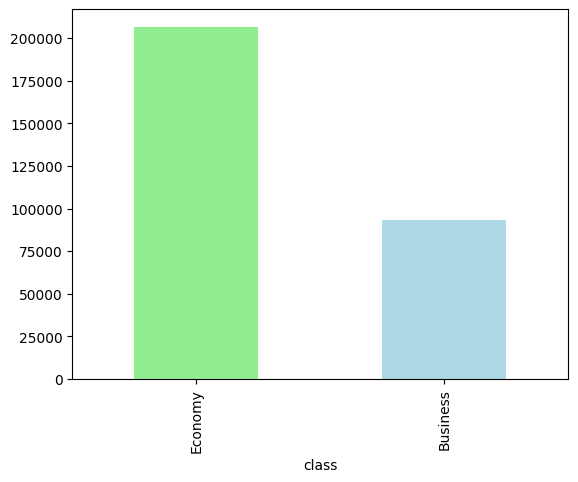

In [7]:
print(df['class'].value_counts())
df['class'].value_counts().plot(kind='bar',color=['lightgreen','lightblue'])

In [8]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

Text(0, 0.5, 'Frequency')

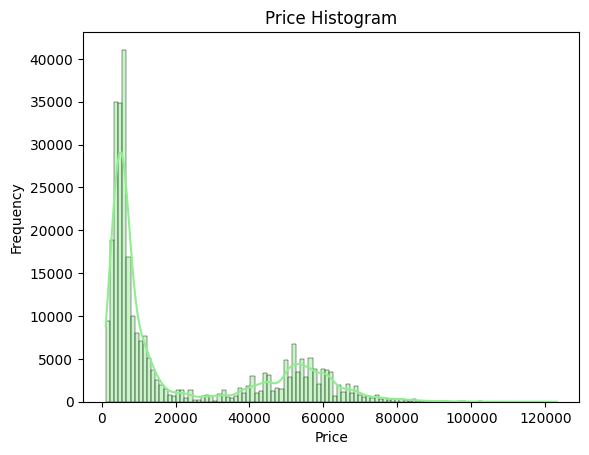

In [9]:
sns.histplot(df.price, kde=True,color='lightgreen')
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0.5, 0, 'Price (INR)')

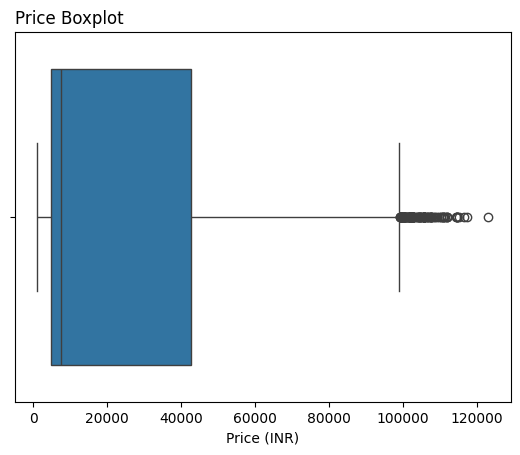

In [10]:
sns.boxplot(df,x=df.price)
plt.title('Price Boxplot',loc='left')
plt.xlabel('Price (INR)')

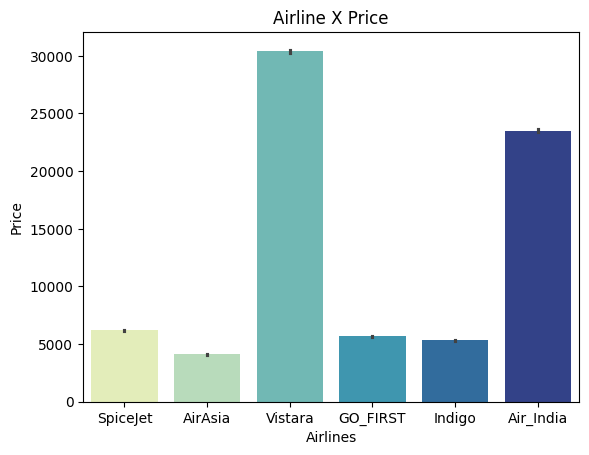

In [11]:
sns.barplot(df, x = df.airline, y = df.price,palette='YlGnBu')
plt.title('Airline X Price')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.show()

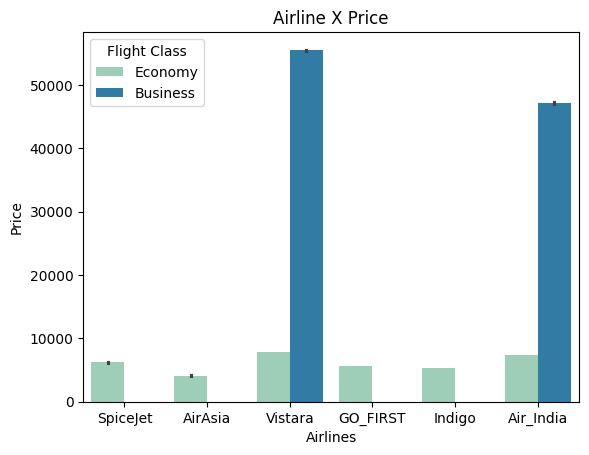

In [12]:
sns.barplot(df, x = df.airline, y = df.price, hue=df['class'],palette='YlGnBu')
plt.title('Airline X Price')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.legend(title='Flight Class')
plt.show()

lets check the prices for above 2 days and below 2 days

In [13]:
def highter(i):
    if i > 2:
        return 'Above 2 Days'
    else:
        return 'Below 2 Days'

In [14]:
df_days = df.copy()
df_days['days'] = df.days_left.apply(highter)

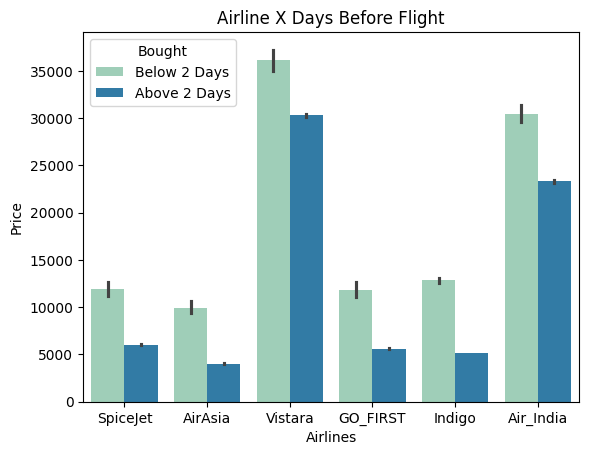

In [15]:
sns.barplot(df, x = df_days.airline, y = df_days.price, hue=df_days['days'],palette='YlGnBu')
plt.title('Airline X Days Before Flight')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.legend(title='Bought')
plt.show()

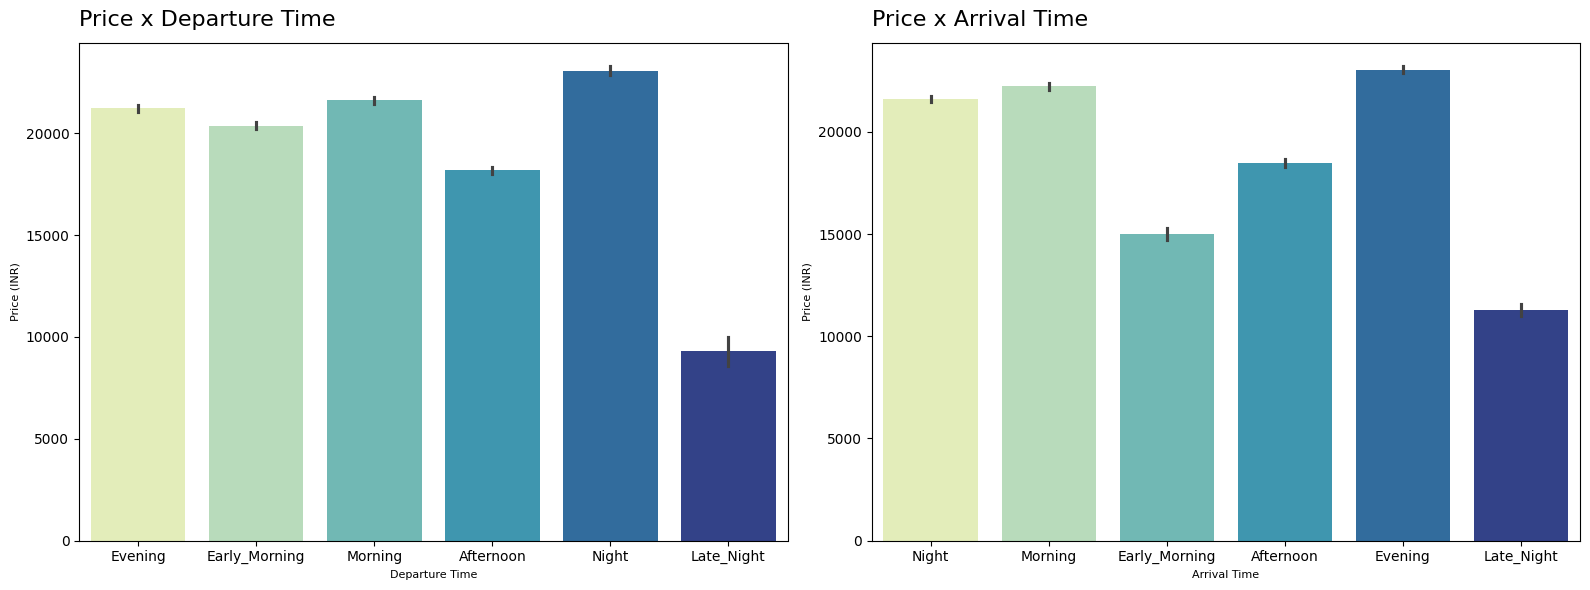

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.barplot(ax = axes[0], data = df, x = df.departure_time, y = df.price, palette = 'YlGnBu')
axes[0].set_title("Price x Departure Time", loc = 'left', fontsize = 16, pad = 12)
axes[0].set_xlabel("Departure Time", fontsize = 8)
axes[0].set_ylabel("Price (INR)", fontsize = 8)

sns.barplot(ax = axes[1], data = df, x = df.arrival_time, y = df.price, palette = 'YlGnBu')
axes[1].set_title("Price x Arrival Time", loc = 'left', fontsize = 16, pad = 12)
axes[1].set_xlabel("Arrival Time", fontsize = 8)
axes[1].set_ylabel("Price (INR)", fontsize = 8)

plt.tight_layout()
plt.show()

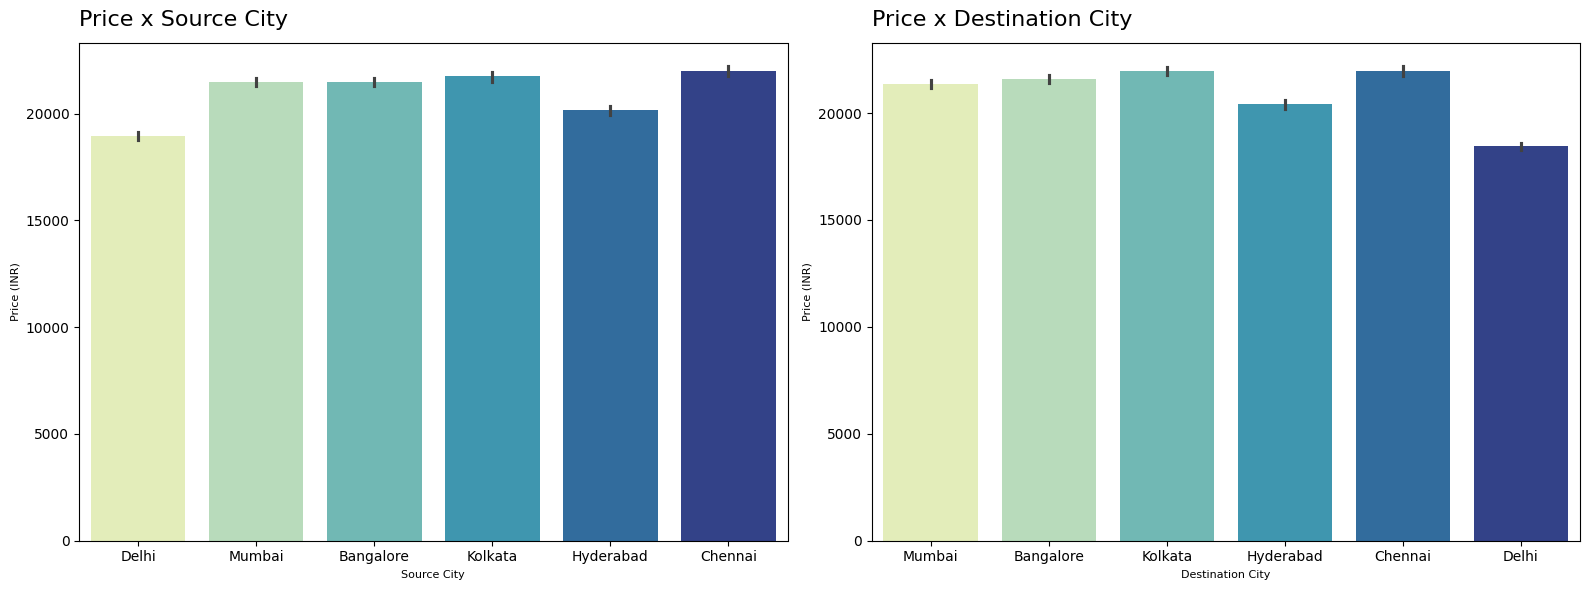

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.barplot(ax = axes[0], data = df, x = df.source_city, y = df.price, palette = 'YlGnBu')
axes[0].set_title("Price x Source City", loc = 'left', fontsize = 16, pad = 12)
axes[0].set_xlabel("Source City", fontsize = 8)
axes[0].set_ylabel("Price (INR)", fontsize = 8)

sns.barplot(ax = axes[1], data = df, x = df.destination_city, y = df.price, palette = 'YlGnBu')
axes[1].set_title("Price x Destination City", loc = 'left', fontsize = 16, pad = 12)
axes[1].set_xlabel("Destination City", fontsize = 8)
axes[1].set_ylabel("Price (INR)", fontsize = 8)

plt.tight_layout()
plt.show()

<Axes: >

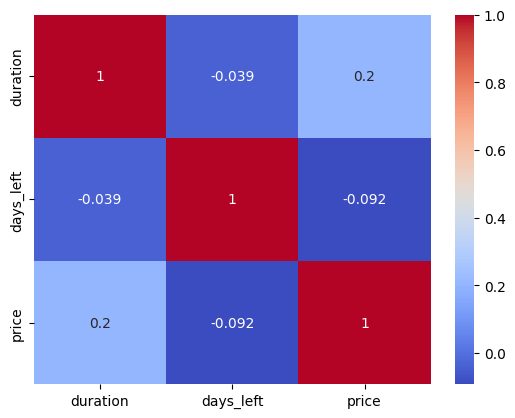

In [18]:
#correlation Matrix 
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True,cmap='coolwarm')

Getting the Data Ready for Training and Testing

In [19]:
features = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']
target = 'price'

X = df[features]
y = df[target]

In [24]:
cat_features = X.select_dtypes(include = 'object').columns.to_list()
num_features = X.select_dtypes(include = 'number').columns.to_list()

In [21]:
#model pipeline
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer,CategoricalImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
num_transformer = Pipeline([
    ('imput', MeanMedianImputer(imputation_method='median')),
])

cat_transformer = Pipeline([
    ('imput', CategoricalImputer(imputation_method='frequent')),
    ('ohe', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)


## Linear Regression

In [30]:
#import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
model = LinearRegression()

linearmodel = Pipeline([('preprocessor',preprocessor),
                       ('model',model)])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=120)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(240122, 9)
(240122,)
(60031, 9)
(60031,)


In [39]:
#model fit
linearmodel.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imput',
                                                                   MeanMedianImputer())]),
                                                  ['duration', 'days_left']),
                                                 ('cat',
                                                  Pipeline(steps=[('imput',
                                                                   CategoricalImputer(imputation_method='frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['airline', 'source_city',
                                                   'departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('model', LinearRegression())])

In [40]:
y_pred_train = linearmodel.predict(x_train)
y_pred_test = linearmodel.predict(x_test)

Model Metrics

In [41]:
from sklearn.metrics import mean_squared_error,r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [42]:
print("Model metrics")
print("=" * 50)
print(f'Mean Squared Error in Train: {mse_train}')
print(f'Mean Squared Error in Test: {mse_test}')
print("-" * 50)
print(f'R2 Score in Train: {r2_train}')
print(f'R2 Score in Test: {r2_test}')

Model metrics
Mean Squared Error in Train: 45646433.31717901
Mean Squared Error in Test: 45499766.901058696
--------------------------------------------------
R2 Score in Train: 0.9113692314587974
R2 Score in Test: 0.911798316398754


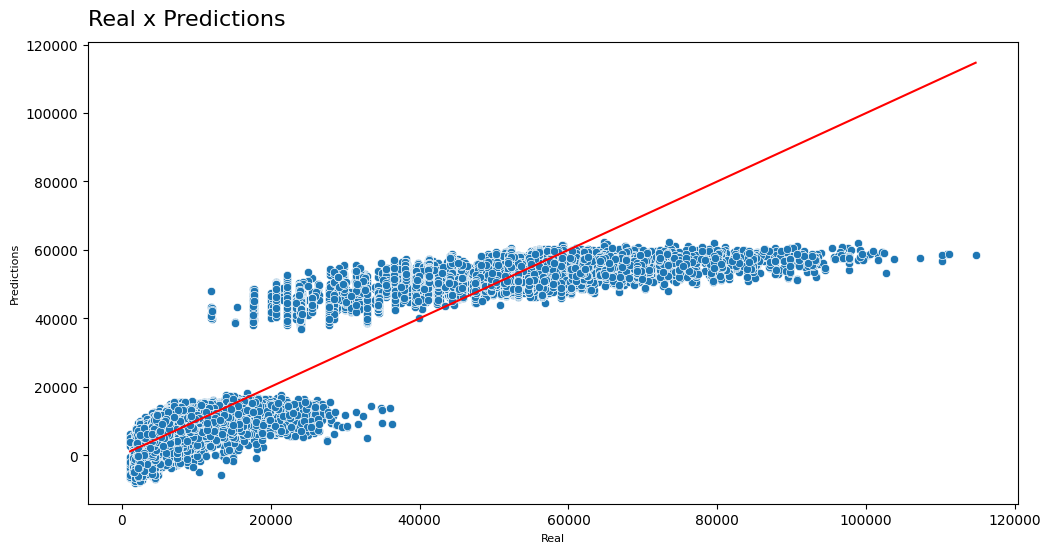

In [43]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.scatterplot(x = y_test, y = y_pred_test)
ax.set_title('Real x Predictions', loc = 'left', fontsize = 16, pad = 12)
ax.set_xlabel('Real', fontsize = 8)
ax.set_ylabel('Predictions', fontsize = 8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.show()

### XGBRegressor

In [32]:
from xgboost import XGBRegressor

In [33]:
xgb = XGBRegressor()

xgbmodel = Pipeline([('preprocessor',preprocessor),
                       ('model',xgb)])

In [34]:
#model fitting
xgbmodel.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imput',
                                                                   MeanMedianImputer())]),
                                                  ['duration', 'days_left']),
                                                 ('cat',
                                                  Pipeline(steps=[('imput',
                                                                   CategoricalImputer(imputation_method='frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['airline', 'source_city',
                                                   'departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [35]:
ypredtrain = xgbmodel.predict(x_train)
ypredtest = xgbmodel.predict(x_test)

In [ ]:
#model metrics

In [44]:
mse_train = mean_squared_error(y_train, ypredtrain)
mse_test = mean_squared_error(y_test, ypredtest)
r2_train = r2_score(y_train, ypredtrain)
r2_test = r2_score(y_test, ypredtest)

In [45]:
print("Model metrics")
print("=" * 50)
print(f'Mean Squared Error in Train: {mse_train}')
print(f'Mean Squared Error in Test: {mse_test}')
print("-" * 50)
print(f'R2 Score in Train: {r2_train}')
print(f'R2 Score in Test: {r2_test}')

Model metrics
Mean Squared Error in Train: 11045122.701713996
Mean Squared Error in Test: 11575287.61683466
--------------------------------------------------
R2 Score in Train: 0.9785538911819458
R2 Score in Test: 0.9775612354278564


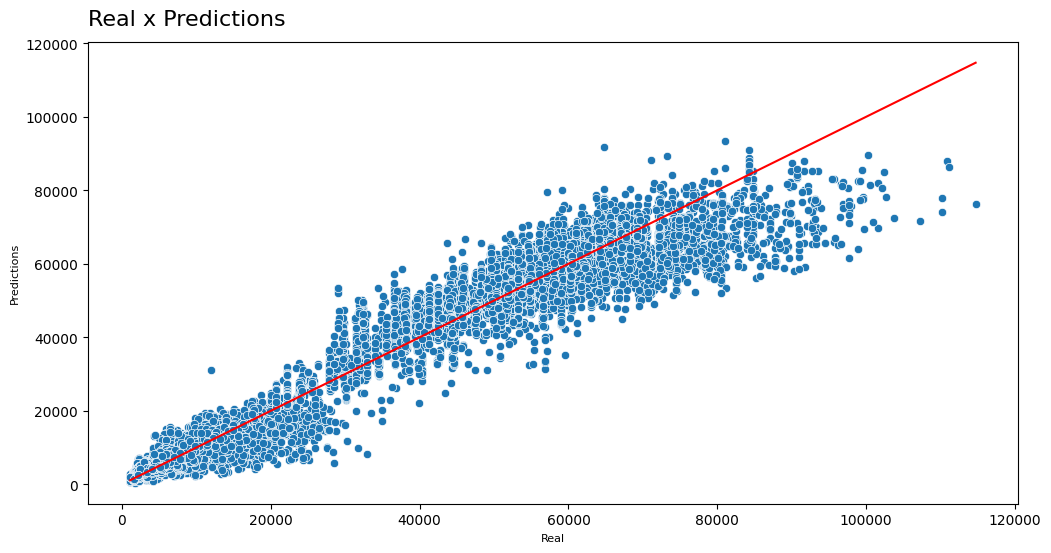

In [46]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.scatterplot(x = y_test, y = ypredtest)
ax.set_title('Real x Predictions', loc = 'left', fontsize = 16, pad = 12)
ax.set_xlabel('Real', fontsize = 8)
ax.set_ylabel('Predictions', fontsize = 8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.show()

In [ ]:
import pickle

In [ ]:
file = 'xgbmodel.pkl'
pickle.dump(xgbmodel,open(file,'wb'))

Checking the model with our own dataframe 


In [83]:
data = {'airline':'SpiceJet',
       'source_city':'Bangalore',
       'departure_time':'Night',
       'stops':'two_or_more',
       'arrival_time':'Early_Morning',
       'destination_city':'Delhi',
       'class':'Economy',
       'duration':14.45,
       'days_left':60.00}
dfnew = pd.DataFrame(data,index=[0])
dfnew

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,SpiceJet,Bangalore,Night,two_or_more,Early_Morning,Delhi,Economy,14.45,60.0


In [79]:
#loading the model from the pkl file we dumped the model
import pickle
model = pickle.load(open('xgbmodel.pkl','rb'))

In [94]:
pred = model.predict(dfnew).round(1)
pred

array([6862.7], dtype=float32)